In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [17]:
#reading the dataset
data= pd.read_csv("heart.csv")

In [18]:
# Inspect the dataset’s structure, summary statistics, and data types
print(data.shape)
print(data.describe())
print(data.info())


(1190, 12)
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.

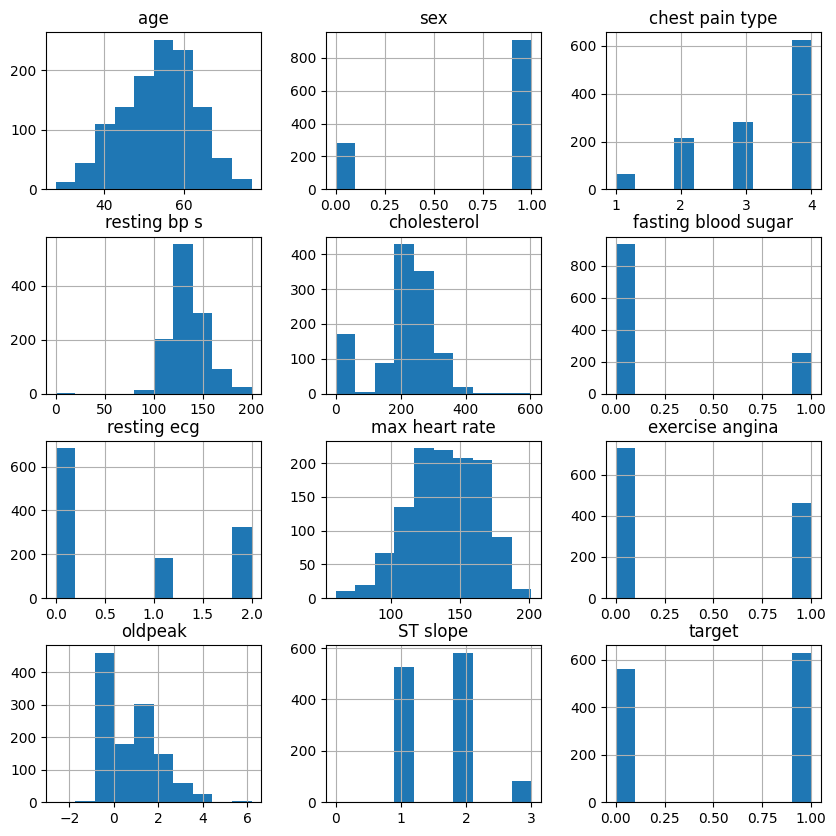

In [19]:
# For numerical features
data.hist(figsize=(10,10))
plt.show()

# For categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    sns.countplot(y=col, data=data)
    plt.show()


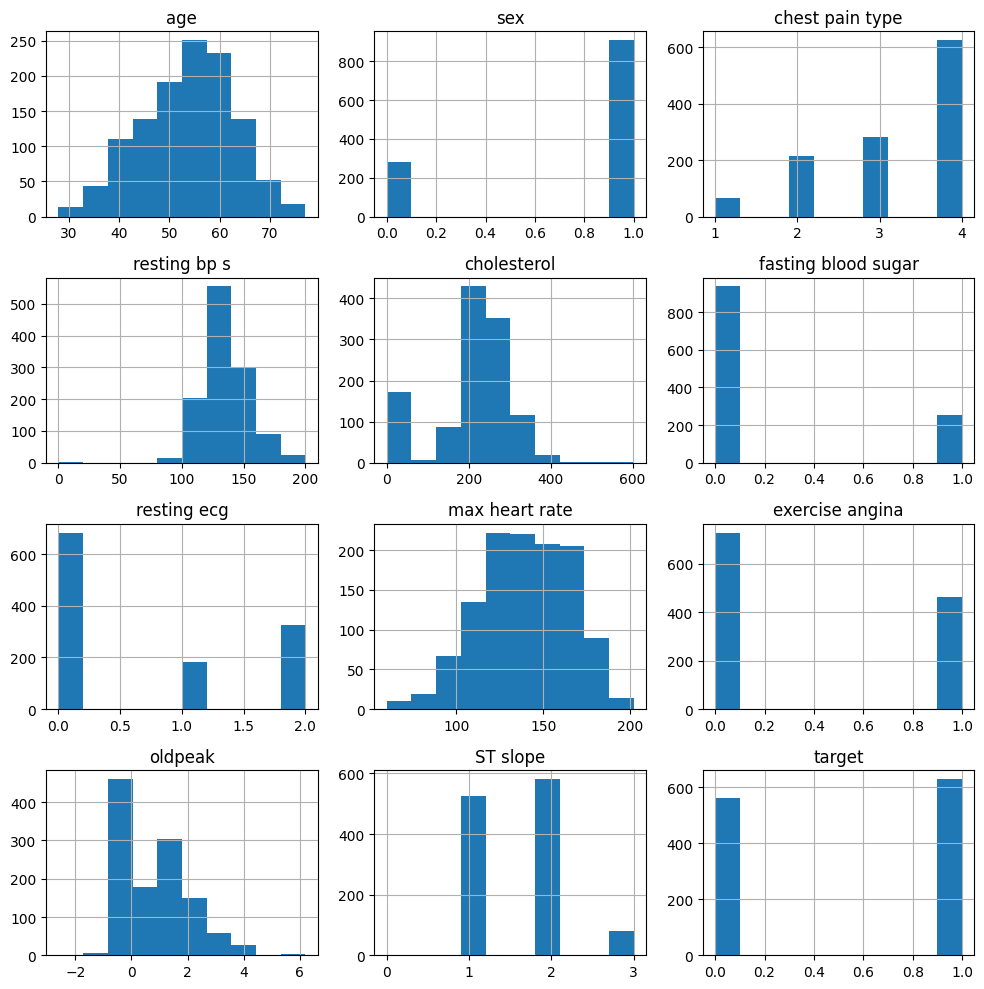

In [20]:
# Visualize distributions of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(10,10))
plt.tight_layout()
plt.show()


In [21]:
print(data.isnull().sum())

# Handling missing values - this depends on the nature of your data.
# Here's an example of how to fill missing values with the mean
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [22]:
# Assuming 'target' is the name of your target variable
correlations = data.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))


Most Positive Correlations:
 oldpeak            0.398385
chest pain type    0.460127
exercise angina    0.481467
ST slope           0.505608
target             1.000000
Name: target, dtype: float64

Most Negative Correlations:
 max heart rate        -0.413278
cholesterol           -0.198366
resting ecg            0.073059
resting bp s           0.121415
fasting blood sugar    0.216695
Name: target, dtype: float64


In [24]:
# Assuming all columns except 'target' are features
features = data.drop('target', axis=1)
target = data['target']


In [27]:
# Feature selection
corr_matrix = data.corr()
relevant_features = corr_matrix[abs(corr_matrix['target'])>0.1].index
X = data[relevant_features]
y = data['target']


In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (952, 11) (952,)
Testing set: (238, 11) (238,)


In [32]:
import warnings
warnings.filterwarnings('ignore')

Best parameters:
{'classifier': SVC(C=1), 'classifier__C': 1, 'classifier__gamma': 'scale'}

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238


Confusion Matrix:
[[107   0]
 [  0 131]]



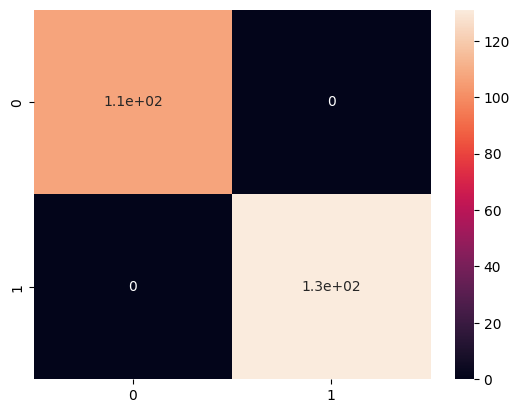

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Define parameters for each classifier
param_grid = [
    {
        'classifier': [SVC()],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__C': [1, 10, 100]
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': np.logspace(-4, 4, 20)
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__criterion' : ['gini', 'entropy'],
        'classifier__max_depth' : [2, 4, 6, 8, 10, 12]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators' : list(range(10,101,10)),
        'classifier__max_features' : list(range(6,32,5))
    }
]

# Initialize and train using a pipeline
pipe = Pipeline(steps=[('preprocessor', StandardScaler()),
                       ('classifier', SVC())])    # Default classifier is SVC, but GridSearchCV will try all classifiers

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict on the test data
y_pred = grid_search.predict(X_test)

# Compute and report accuracy, classification report, and confusion matrix
print("Best parameters:\n{}\n".format(grid_search.best_params_))
print("Accuracy: {:.2f}%\n".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n{}\n".format(cm))

# Visualize the confusion matrix
sns.heatmap(cm, annot=True)
plt.show()


In [47]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipelines
pipe_svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(probability=True))])
pipe_logreg = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
pipe_tree = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())])
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

# Hyperparameters
svm_params = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']}
logreg_params = {'logreg__C': [0.1, 1, 10]}
tree_params = {'tree__max_depth': [3, 5, 10]}
rf_params = {'rf__n_estimators': [100, 200, 500]}

# Grid search
gs_svm = GridSearchCV(pipe_svm, svm_params, cv=5)
gs_logreg = GridSearchCV(pipe_logreg, logreg_params, cv=5)
gs_tree = GridSearchCV(pipe_tree, tree_params, cv=5)
gs_rf = GridSearchCV(pipe_rf, rf_params, cv=5)

# Fit grid search
gs_svm.fit(X_train, y_train)
gs_logreg.fit(X_train, y_train)
gs_tree.fit(X_train, y_train)
gs_rf.fit(X_train, y_train)

# Best models
best_svm = gs_svm.best_estimator_
best_logreg = gs_logreg.best_estimator_
best_tree = gs_tree.best_estimator_
best_rf = gs_rf.best_estimator_
# Model names
model_name = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
# Best models
best_models = [best_svm, best_logreg, best_tree, best_rf]

# Evaluate models
for model,name in zip(best_models,model_name):

    y_pred = model.predict(X_test)

    acc = model.score(X_test, y_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cf_matrix)
    print('\n-------------------\n')


Results for SVM:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]

-------------------

Results for Logistic Regression:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]

-------------------

Results for Decision Tree:
Accuracy: 1.0
Classification Report:
              precision    recal

VotingClassifier 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[107   0]
 [  0 131]]


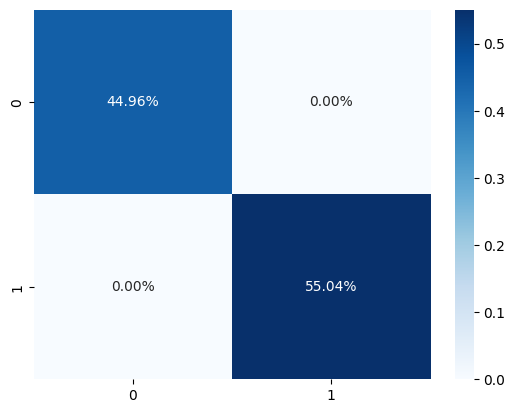

VotingClassifier 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[107   0]
 [  0 131]]


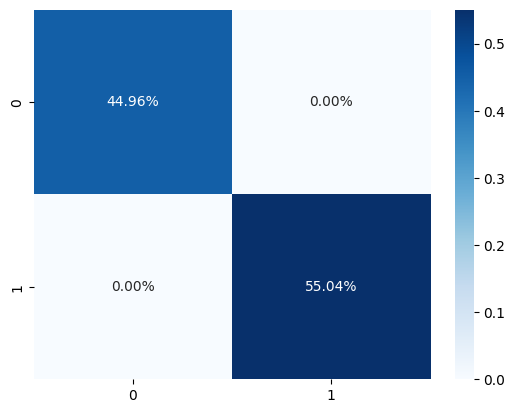

In [37]:
from sklearn.ensemble import VotingClassifier

# Create voting classifier
voting_clf_hard = VotingClassifier(estimators=[('svm', best_svm), ('logreg', best_logreg),
                                               ('tree', best_tree), ('rf', best_rf)], voting='hard')

voting_clf_soft = VotingClassifier(estimators=[('svm', best_svm), ('logreg', best_logreg),
                                               ('tree', best_tree), ('rf', best_rf)], voting='soft')

# Fit model
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

# Predict
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

# Print performance metrics
for clf in (voting_clf_hard, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
    plt.show()


Results for SVM:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


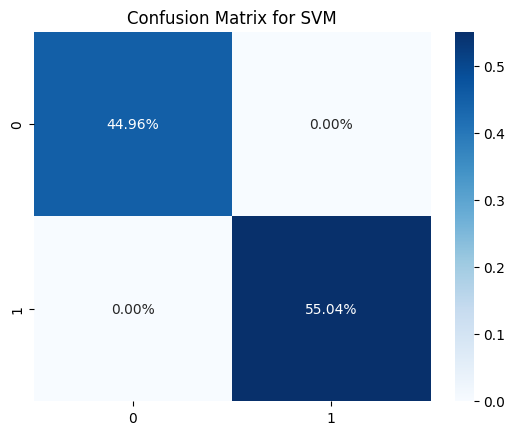

-------------------

Results for Logistic Regression:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


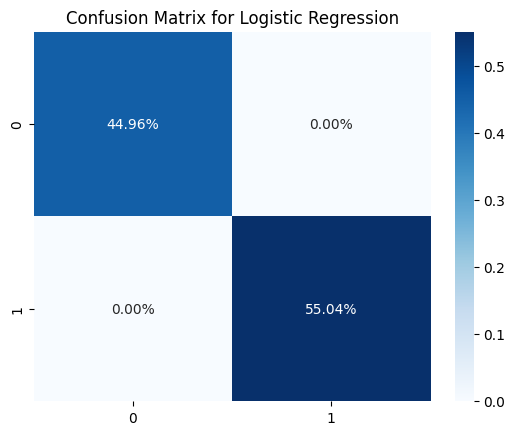

-------------------

Results for Decision Tree:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


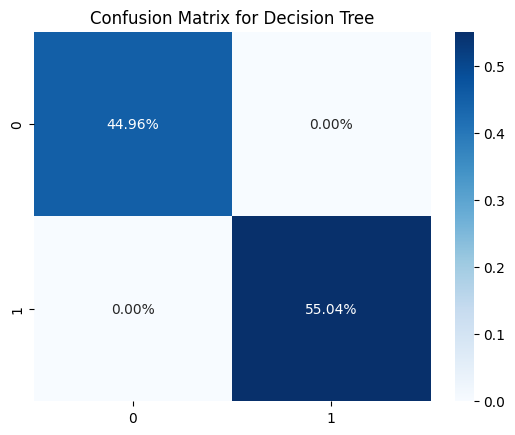

-------------------

Results for Random Forest:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


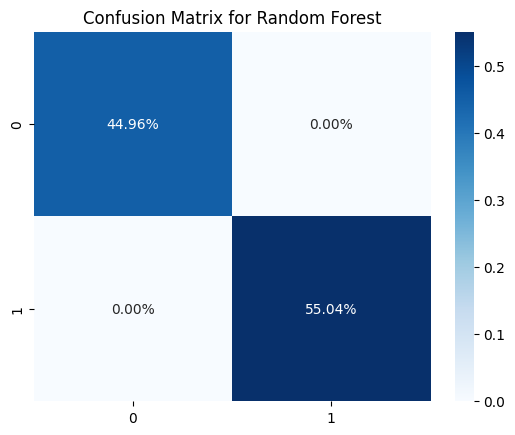

-------------------

Results for Voting Classifier Hard:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


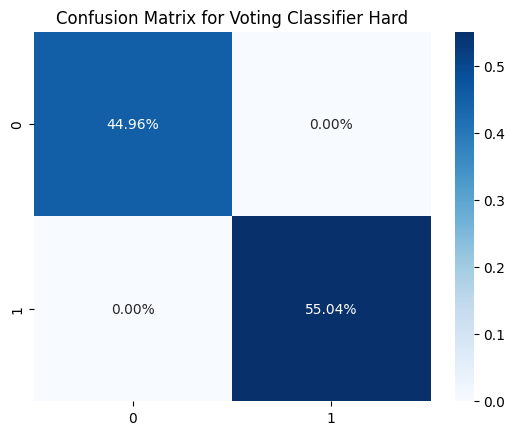

-------------------

Results for Voting Classifier Soft:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


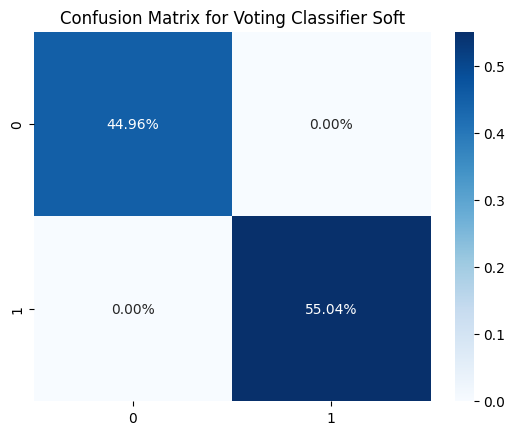

-------------------



In [38]:
# Individual models for comparison
individual_models = [best_svm, best_logreg, best_tree, best_rf]

# Names of models for display
model_names = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest',
               'Voting Classifier Hard', 'Voting Classifier Soft']

# Voting classifiers
voting_models = [voting_clf_hard, voting_clf_soft]

# Combine individual models and voting classifiers
all_models = individual_models + voting_models

for model, name in zip(all_models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cf_matrix)

    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    print("-------------------\n")
